# 주제 : 유튜브 동영상 댓글 크롤링과 분석 
## 2020 FIFA 푸스카스상 후보자 동영상

<br>
<br>

# 1. 서론

* FIFA 푸스카스상이란? <br>
FIFA가 2009년 10월 20일 처음 제정한 상으로, 해당 연도 전년 11월부터 해당 연도 10월까지 1년간 전 세계에서 나온 골 중 가장 멋진 골을 기록한 선수에게 수여함
<br>
* 손흥민 선수가 아시아인 최초로 수상한 것으로 화제가 되었음
<br> <br>
* 순위 선정 방식 : 축구 전문가 패널 투표 (50%) + 팬 투표 (50%)
<br>
(순위는 TOP 3와 1등만 공개함)

* 목적 : FIFA 푸스카스상 후보자들의 동영상에 달린 댓글을 수집하여 분석하는 것임
<br>
* 절차 : 데이터 수집 (크롤링), NLP 전처리, Vectorization, 감성 분석, 토픽 모델링
<br>
(감석 분석과 토픽 모델링은 맛보기용..)


<br>
<br>

# 라이브러리 및 데이터 수집

데이터는 피파 공식 유튜브 채널 (FIFATV)에서 <br>
"FIFA Puskas Award 2020 | The Nominees" 재생목록에서 수집함 <br>

전체 후보자(11명)를 소개하는 영상과 각 후보자들의 골영상으로 구성됨
<br> <br>
수집한 데이터 항목 (features)
* 동영상 제목
* 동영상 조회수
* 타임 스탬프
* 좋아요 수
* 싫어요 수
* 댓글 수
* 댓글 본문

<br>
댓글 수, 자주 사용된 단어 등을 통해 후보자에 대한 유저들의 선호도를 파악함

In [1]:
### 크롤링에 필요한 module import
import requests
from bs4 import BeautifulSoup
import time
import urllib.request #
from selenium.webdriver import Chrome
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd

### url을 불러오기 위한 사전 작업을 실행
delay=3
browser = webdriver.Chrome(ChromeDriverManager().install())
# browser = Chrome(executable_path=r'C:\Users\user\likelion\Project_01\chromedriver.exe')
browser.implicitly_wait(delay)

start_url  = 'https://www.youtube.com'
browser.get(start_url)  
browser.maximize_window()

### 검색창 영역을 클릭 -> 키워드를 입력한 뒤 -> enter 클릭
browser.find_elements_by_xpath('//*[@id="search"]')[0].click() # 검색창영역클릭
browser.find_elements_by_xpath('//*[@id="search"]')[0].send_keys('FIFA Puskas Award 2020 | The Nominees') # 검색창 영역에 원하는 youtuber입력
browser.find_elements_by_xpath('//*[@id="search"]')[0].send_keys(Keys.RETURN)# 엔터'FIFA Puskas Award 2020 | The Nominees'

### 동영상 클릭
browser.find_elements_by_xpath('//*[@id="overlays"]/ytd-thumbnail-overlay-side-panel-renderer')[0].click()

### 작업환경 page 소스 추출 및 크롤링
html0 = browser.page_source
html = BeautifulSoup(html0,'html.parser')

puskas = pd.DataFrame({'name':[],
                     'view':[],
                     'start_date':[],
                     'likes_num':[],
                     'unlikes_num':[]})

for i in range(1,13):
        
    if i==12: break

    browser.find_elements_by_xpath('//*[@id="index"]')[i].click()
    html0 = browser.page_source
    html = BeautifulSoup(html0,'html.parser')
    
    name = html.find('yt-formatted-string',{'class':'style-scope ytd-video-primary-info-renderer'}).text

    view = html.find_all('span',{'class':'view-count style-scope ytd-video-view-count-renderer'})[0].text.split()[1]

    start_date = html.find('div',{'id':'date'}).find('yt-formatted-string', {'class':'style-scope ytd-video-primary-info-renderer'}).text

    likes_num = html.find('yt-formatted-string',{'id':'text','class':'style-scope ytd-toggle-button-renderer style-text','aria-label':re.compile('좋아요')})['aria-label']

    unlikes_num = html.find('yt-formatted-string',{'id':'text','class':'style-scope ytd-toggle-button-renderer style-text','aria-label':re.compile('싫어요')})['aria-label']

    insert_data = pd.DataFrame({'name':[name],
                     'view':[view],
                     'start_date':[start_date],
                     'likes_num':[likes_num],
                     'unlikes_num':[unlikes_num]})
    
    puskas = puskas.append(insert_data)
    
    time.sleep(1.5)

    
    


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [C:\Users\user\.wdm\drivers\chromedriver\win32\89.0.4389.23\chromedriver.exe] found in cache


수집 결과

In [2]:
puskas.to_csv('graph_0.csv')
puskas

,name,view,start_date,likes_num,unlikes_num
0,FIFA Puskas Award 2020 | The Nominees,"684,465회",2020. 11. 25.,"좋아요 12,383개",싫어요 615개
0,Son Heungmin Goal | FIFA Puskas Award 2020 Winner,"2,826,840회",2020. 11. 25.,"좋아요 83,592개","싫어요 1,624개"
0,Giorgian De Arrascaeta Goal | FIFA Puskas Awar...,"856,963회",2020. 11. 25.,"좋아요 12,886개",싫어요 429개
0,Luis Suarez Goal | FIFA Puskas Award 2020 Fina...,"826,075회",2020. 11. 25.,"좋아요 10,807개","싫어요 1,061개"
0,Shirley Cruz Goal | FIFA Puskas Award 2020 Nom...,"374,999회",2020. 11. 25.,"좋아요 2,061개",싫어요 483개
0,Jordan Flores Goal | FIFA Puskas Award 2020 No...,"363,863회",2020. 11. 25.,"좋아요 2,579개",싫어요 128개
0,Andre-Pierre Gignac Goal | FIFA Puskas Award 2...,"506,407회",2020. 11. 25.,"좋아요 5,755개",싫어요 268개
0,Sophie Ingle Goal | FIFA Puskas Award 2020 Nom...,"260,698회",2020. 11. 25.,"좋아요 1,346개",싫어요 301개
0,Zlatko Junuzovic Goal | FIFA Puskas Award 2020...,"279,321회",2020. 11. 25.,"좋아요 1,600개",싫어요 102개
0,Hlompho Kekana Goal | FIFA Puskas Award 2020 N...,"301,141회",2020. 11. 25.,"좋아요 2,985개",싫어요 93개


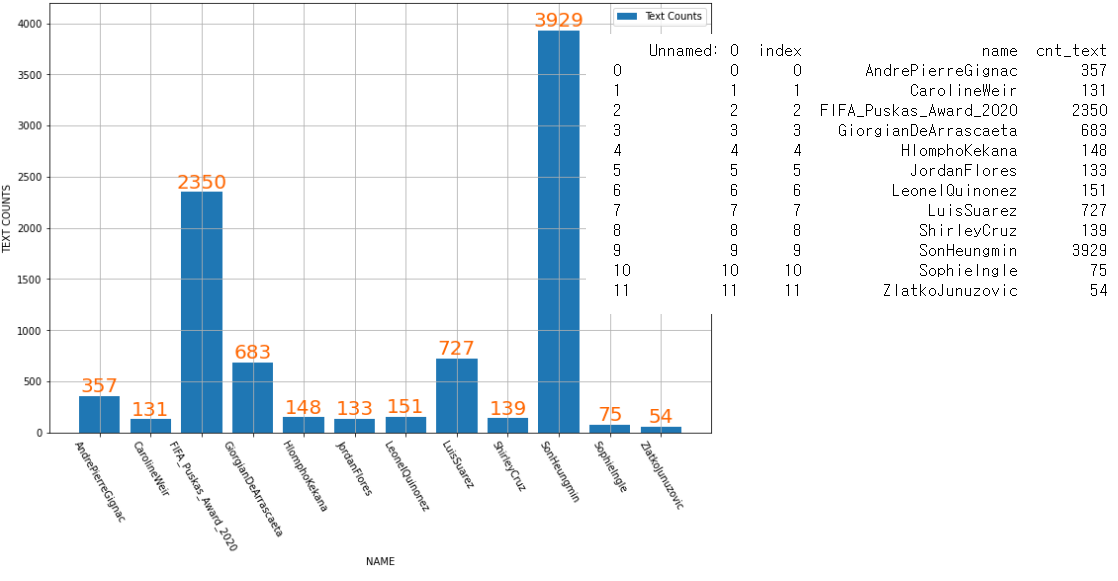

후보자 별 동영상 조회수

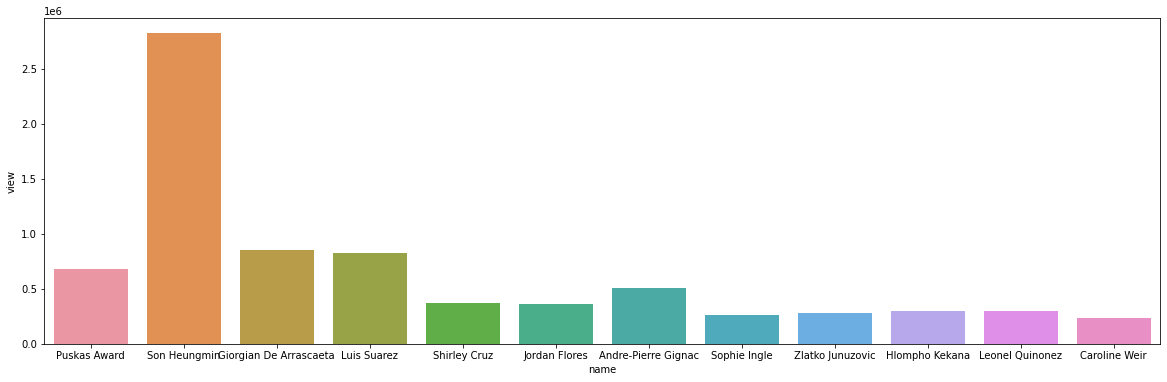

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

ddd = pd.read_csv('graph_1.csv')
plt.figure(figsize=(20, 6))
sns.barplot(data=ddd, x="name", y="view")
plt.show()

<br>
<br>
후보자 별 동영상 좋아요 수

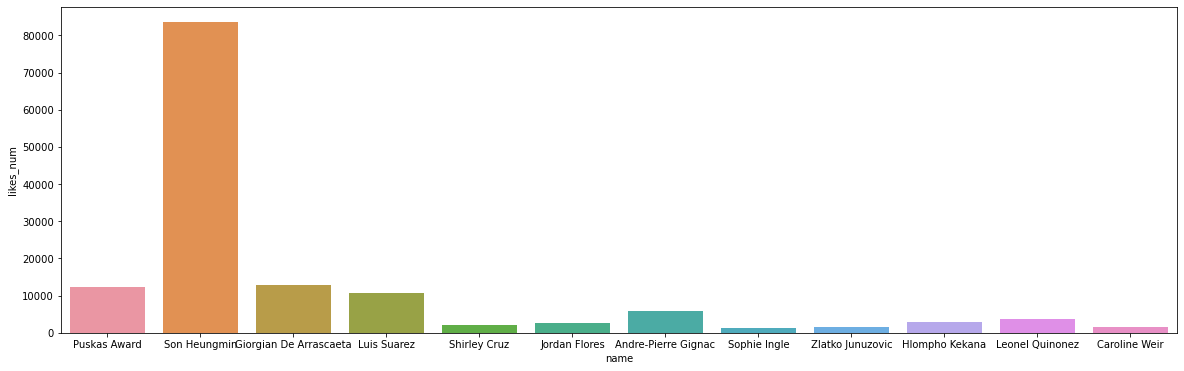

In [4]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ddd, x="name", y="likes_num")
plt.show()

<br>
<br>
후보자 별 동영상 싫어요 수

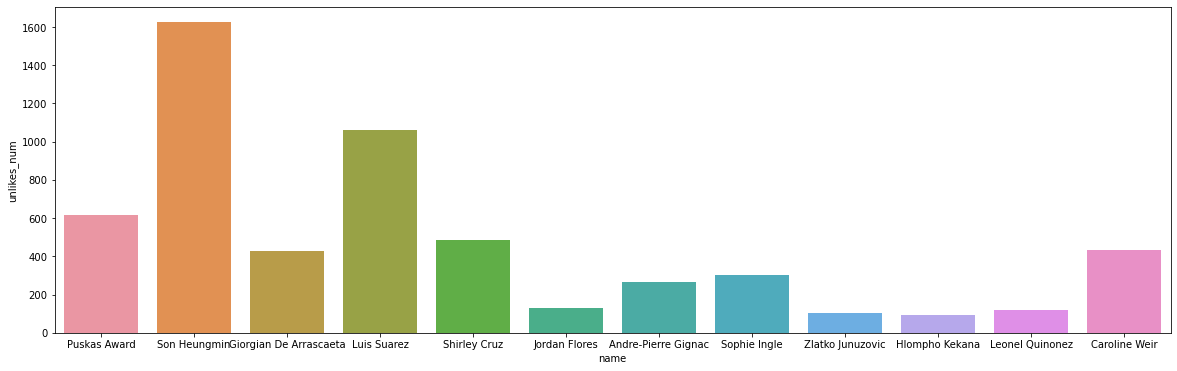

In [5]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ddd, x="name", y="unlikes_num")
plt.show()

<br>
<br>
후보자 별 동영상 댓글 수

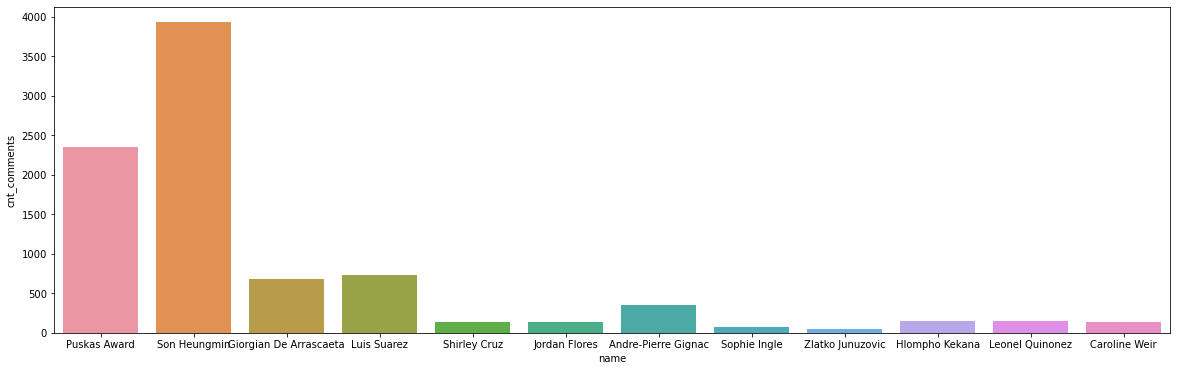

In [6]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ddd, x="name", y="cnt_comments")
plt.show()

Top3 (Son Heungmin, Giorgian De Arrascaeta, Luis Suarez) 후보자 동영상의 <br>
조회수, 좋아요 수, 싫어요 수, 댓글수가 다른 후보자 동영상에 비해 많은 것을 확인할 수 있음

<br>
<br>
후보자별 '좋아요 수'에 대한 '싫어요 수' 비

In [7]:
ddd['like_ratio'] = ddd['unlikes_num']/ddd['likes_num']
print("like_ratio = unlikes_num/likes_num")
ddd[['name','likes_num','unlikes_num','like_ratio']]

like_ratio = unlikes_num/likes_num


,name,likes_num,unlikes_num,like_ratio
0,Puskas Award,12383,615,0.049665
1,Son Heungmin,83557,1625,0.019448
2,Giorgian De Arrascaeta,12884,429,0.033297
3,Luis Suarez,10799,1061,0.098250
4,Shirley Cruz,2061,483,0.234352
5,Jordan Flores,2579,128,0.049632
6,Andre-Pierre Gignac,5755,268,0.046568
7,Sophie Ingle,1346,301,0.223626
8,Zlatko Junuzovic,1600,102,0.063750
9,Hlompho Kekana,2985,93,0.031156


비율로 확인해본 결과, 손흥민 선수의 비율이 다른 Top3 후보자에 비해 낮은 것을 확인함

<br>
<br>
동영상 댓글 수와 동영상 조회수의 관계

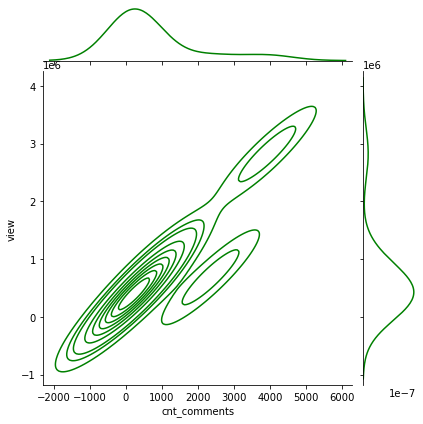

In [8]:
sns.jointplot(kind='kde', data=ddd, x='cnt_comments', y='view', color='green')
plt.show()

<br>
<br>
변수들의 상관관계 분석

* 표본이 너무 적어 피어슨 상관계수가 의미가 없음

In [9]:
ddd.corr()

,view,likes_num,unlikes_num,cnt_comments,like_ratio
view,1.000000,0.990338,0.888115,0.906909,-0.363867
likes_num,0.990338,1.000000,0.853184,0.906900,-0.340652
unlikes_num,0.888115,0.853184,1.000000,0.836192,-0.072649
cnt_comments,0.906909,0.906900,0.836192,1.000000,-0.369981
like_ratio,-0.363867,-0.340652,-0.072649,-0.369981,1.000000


<AxesSubplot:>

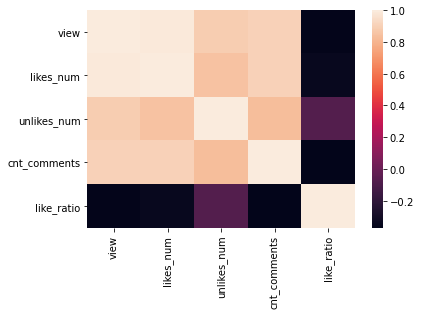

In [10]:
sns.heatmap(ddd.corr())

In [11]:
import numpy as np
import pandas as pd
import glob
import re

### 댓글 데이터 수집 (다른 사람 코드 사용)
### 출처 : https://github.com/egbertbouman/youtube-comment-downloader

input_path = "C:/Users/user/likelion/Project_01/data/*.csv"
file_list = [f for f in glob.glob(input_path)]
print(file_list)

dfs = {}
for idx, file in enumerate(file_list):
    dfs[idx] = pd.read_csv(f"{file}", sep='\n', encoding='utf-8', header=None)
    
    dfs[idx]["text"] = dfs[idx][0]
    dfs[idx]["vote"] = dfs[idx][0]
    dfs[idx]["time"] = dfs[idx][0]
    for i in range(len(dfs[idx])):
        dfs[idx]["text"].iloc[i] = dfs[idx][0].iloc[i][re.search(", \"text\": ", dfs[idx][0].iloc[i]).span()[1]:re.search(", \"time\": ", dfs[idx][0].iloc[i]).span()[0]]
        dfs[idx]["time"].iloc[i] = dfs[idx][0].iloc[i][re.search(", \"time\": ", dfs[idx][0].iloc[i]).span()[1]:re.search(", \"author\": ", dfs[idx][0].iloc[i]).span()[0]]
        dfs[idx]["vote"].iloc[i] = dfs[idx][0].iloc[i][re.search(", \"votes\": ", dfs[idx][0].iloc[i]).span()[1]:re.search(", \"photo\": ", dfs[idx][0].iloc[i]).span()[0]]
    # del dfs[idx][0]

['C:/Users/user/likelion/Project_01/data\\AndrePierreGignac.csv', 'C:/Users/user/likelion/Project_01/data\\CarolineWeir.csv', 'C:/Users/user/likelion/Project_01/data\\FIFA Puskas Award 2020.csv', 'C:/Users/user/likelion/Project_01/data\\GiorgianDeArrascaeta.csv', 'C:/Users/user/likelion/Project_01/data\\HlomphoKekana.csv', 'C:/Users/user/likelion/Project_01/data\\JordanFlores.csv', 'C:/Users/user/likelion/Project_01/data\\LeonelQuinonez.csv', 'C:/Users/user/likelion/Project_01/data\\LuisSuarez.csv', 'C:/Users/user/likelion/Project_01/data\\ShirleyCruz.csv', 'C:/Users/user/likelion/Project_01/data\\SonHeungmin.csv', 'C:/Users/user/likelion/Project_01/data\\SophieIngle.csv', 'C:/Users/user/likelion/Project_01/data\\ZlatkoJunuzovic.csv']


<br>
<br>

# 댓글 데이터 설명

* rows(11개) : 10명의 후보자의 골 동영상 + 전체 후보자 소개 동영상
* columns(3개) : 댓글 내용, 받은 좋아요 수, 댓글 작성일자

In [12]:
"""
dfs[i]["text"] : 댓글 내용
dfs[i]["vote"] : 받은 좋아요 수
dfs[i]["time"] : 댓글 작성일자 (전처리필요)

dfs[0] : AndrePierreGignac 골 동영상
dfs[1] : CarolineWeir 골 동영상
dfs[2] : FIFA_Puskas_Award_2020 후보자 골 모음 동영상
dfs[3] : GiorgianDeArrascaeta 골 동영상 (2위)
dfs[4] : HlomphoKekana 골 동영상
dfs[5] : JordanFlores 골 동영상
dfs[6] : LeonelQuinonez 골 동영상
dfs[7] : LuisSuarez 골 동영상 (3위)
dfs[8] : ShirleyCruz 골 동영상
dfs[9] : SonHeungmin 골 동영상(1위)
dfs[10] : SophieIngle 골 동영상
dfs[11] : ZlatkoJunuzovic 골 동영상
"""
dfs_name = ['AndrePierreGignac', 'CarolineWeir', 'FIFA_Puskas_Award_2020', 'GiorgianDeArrascaeta', 'HlomphoKekana', 'JordanFlores', 'LeonelQuinonez', 'LuisSuarez', 'ShirleyCruz', 'SonHeungmin', 'SophieIngle', 'ZlatkoJunuzovic']

<br>
손흥민 골 영상 댓글 요약

In [13]:
# 댓글 수

[print(i, dfs_name[i], len(dfs[i])) for i in range(len(dfs))]

idx = []
idx_name = []
cnt_text = []
for i in range(len(dfs)):
    idx.append(i)
    idx_name.append(dfs_name[i])
    cnt_text.append(len(dfs[i]))
df_text = pd.DataFrame([idx,idx_name,cnt_text])
df_text = df_text.T
df_text.columns = ["index", "name", "cnt_text"]
df_text.to_csv('graph_2.csv')
df_text

0 AndrePierreGignac 357
1 CarolineWeir 131
2 FIFA_Puskas_Award_2020 2350
3 GiorgianDeArrascaeta 683
4 HlomphoKekana 148
5 JordanFlores 133
6 LeonelQuinonez 151
7 LuisSuarez 727
8 ShirleyCruz 139
9 SonHeungmin 3929
10 SophieIngle 75
11 ZlatkoJunuzovic 54


,index,name,cnt_text
0,0,AndrePierreGignac,357
1,1,CarolineWeir,131
2,2,FIFA_Puskas_Award_2020,2350
3,3,GiorgianDeArrascaeta,683
4,4,HlomphoKekana,148
5,5,JordanFlores,133
6,6,LeonelQuinonez,151
7,7,LuisSuarez,727
8,8,ShirleyCruz,139
9,9,SonHeungmin,3929


In [14]:
# 손흥민 골 댓글
dfs[9].head(20)

,0,text,vote,time
0,"{""cid"": ""UgxydcFfKsrXwwH1X-N4AaABAg"", ""text"": ...","""금호타이어 광고 제대로 했네""","""0""","""3주 전"""
1,"{""cid"": ""UgxQZfMv3XCAFAHAUbN4AaABAg"", ""text"": ...","""What a amazing goal""","""0""","""3주 전"""
2,"{""cid"": ""UgyRHAhvQqg6zil2hLR4AaABAg"", ""text"": ...","""Rancak Bana..!!!""","""0""","""3주 전"""
3,"{""cid"": ""UgyILPpkWGthnm8nAOt4AaABAg"", ""text"": ...","""Show...!!!""","""0""","""3주 전"""
4,"{""cid"": ""UgzsZCepVjnMouQ8WjF4AaABAg"", ""text"": ...","""Well deserved""","""0""","""2주 전"""
5,"{""cid"": ""Ugyz1nSywaPSpWHo9T94AaABAg"", ""text"": ...","""Superrr""","""0""","""2주 전"""
6,"{""cid"": ""UgxI_0aVVMGUj9zT0fl4AaABAg"", ""text"": ...","""Barcelona vs PSG Messi rocket 🚀""","""0""","""2주 전"""
7,"{""cid"": ""UgzeS6IVo4SpWTNenFN4AaABAg"", ""text"": ...","""👏👏👏👏👏👏👏👏👏""","""0""","""2주 전"""
8,"{""cid"": ""UgwOEBCb9lMLg76czcJ4AaABAg"", ""text"": ...","""Suarez snd Arrascaetas were both much better ...","""0""","""2주 전(수정됨)"""
9,"{""cid"": ""Ugxknx0_gv--W7jza6F4AaABAg"", ""text"": ...","""Better than Maradona""","""0""","""2주 전"""


In [15]:
# 날짜 구성

cnt_text = dfs[9].groupby("time").count()

cnt_text.to_csv('graph_3.csv')

In [16]:
dfs[7].groupby("time").count()

,0,text,vote
time,,,
"""1개월 전""",9,9,9
"""1주 전""",1,1,1
"""2개월 전""",13,13,13
"""2개월 전(수정됨)""",1,1,1
"""3개월 전""",442,442,442
"""3개월 전(수정됨)""",24,24,24
"""4개월 전""",223,223,223
"""4개월 전(수정됨)""",13,13,13
"""4주 전""",1,1,1


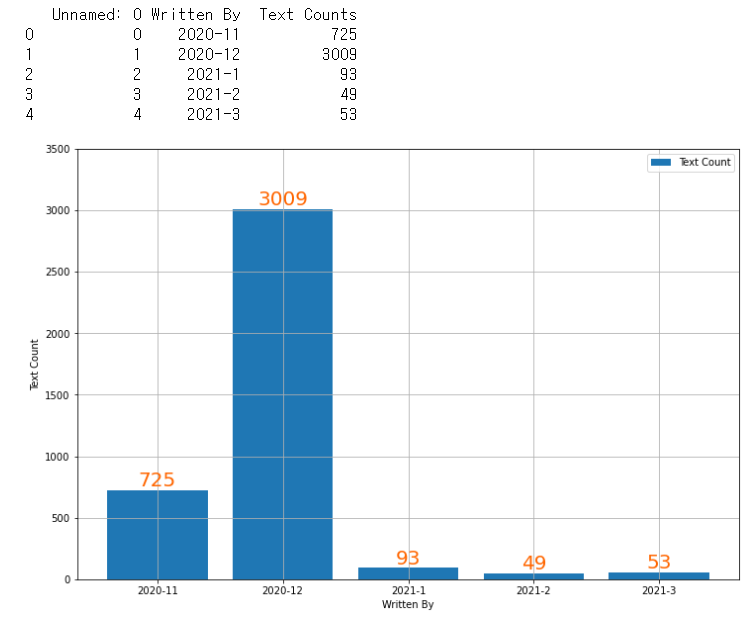

* 수상일자(2020-12-18) 전/후를 기준으로 동영상의 댓글이 많이 달린 것을 확인함
* 유튜브 댓글 크롤링 시, 타임스탬프 문제로 인한, 전/후 분석과 정확한 시간에 따른 댓글 변화 분석이 어려웠음

In [17]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# 푸스카스 시상식 일시 : 2020년 12월 18일 (금) 오전 3:00 (한국기준)
puskas_date = datetime(2020, 12, 18, 3, 0, 0) 

now = datetime.now()
gap = now - puskas_date
target_1 = now - relativedelta(months=3)
target_2 = now - relativedelta(months=4)

print(gap)
print(target_1)
print(target_2)

106 days, 8:55:14.941966
2021-01-03 11:55:14.941966
2020-12-03 11:55:14.941966


<br>
<br>

# 2. 분석

<br>

# 분석 내용 1 : 토큰화, 단어 빈도수 분석
<br>

### 분석에 사용한 동영상 
### : 후보자 5명 (TOP3 후보 3명 + 후보 2명) + 전체 후보자 소개 동영상

NLTK 형태소 분석기의 word_tokenize()를 활용하여 댓글의 토큰화 수행
<br>
<br>
1) 단어의 토큰화는 단어 전체, 명사, 형용사, bigram, trigram에 대하여 진행함 <br>
2) 불용어 제거 (영어, 특수문자, 사용자 정의) <br>
3) 단어 치환 (유사단어,고유명사,복수형 등)
* 각 동영상별로 빈도수 TOP100의 결과를 비교하여 치환 수행
<br>

(예시) <br> son heung min, sonny, sonaldo, ... → son <br>
deserved, deserve, ... → deserve <br>
south korea → korea  <br> girl, woman, female, ... → women 등
<br>
<br>


In [18]:
import nltk
import string
from wordcloud import WordCloud
from PIL import Image
from tqdm.notebook import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

custom_stopwords = ['\'\'', '``', '!', '?', '...', '\'s', '’', '..', 'n\'t', '\'m', '....', '\'re' ]
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)+custom_stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [19]:
# 동영상 별 토큰화

top3 = [] # 댓글 저장 리스트
top3_nouns =[] # 명사 저장 리스트
top3_adjectives = [] # 형용사 저장 리스트
top3_fd = [] # FreqDist 저장 리스트
top3_bigram = [] # bigram 저장 리스트
top3_trigram = [] # trigram 저장 리스트
top3_tokens = [] # nltk.Text() 저장 리스트

top3.append(' '.join(list(dfs[9]["text"]))) # 손흥민 댓글 (한국어 존재)
top3.append(' '.join(list(dfs[3]["text"]))) # 아라스카에타 댓글 (우루과이어 존재)
top3.append(' '.join(list(dfs[7]["text"]))) # 수아레즈 댓글
top3.append(' '.join(list(dfs[1]["text"]))) # 캐롤라인위어 댓글
top3.append(' '.join(list(dfs[2]["text"]))) # 전체 후보자 소개 동영상 댓글
top3.append(' '.join(list(dfs[4]["text"]))) # 흐롬포케카나 댓글

def word_replace(tokens):
    
    new_token = []

    for token in tokens:

        #문자열 치환
        token = token.replace("son heung min", "son")
        token = token.replace("heung min son", "son")
        token = token.replace("heung min", "son")
        token = token.replace("heung", "son")
        token = token.replace("min", "son")
        token = token.replace("sonaldo", "son")    
        token = token.replace("sonny", "son")
        token = token.replace("son-son", "son")
        
        token = token.replace("goals", "goal")
        token = token.replace("players", "player")
        token = token.replace("win", "winner")
        token = token.replace("winnerner", "winner")
        token = token.replace("deserved", "deserve")
        token = token.replace("deserves", "deserve")
        token = token.replace("jumo", "korea")
        token = token.replace("korean", "korea")
        token = token.replace("south korea", "korea")
        token = token.replace("asian", "asia")
        
        token = token.replace("woman", "women")
        token = token.replace("girl", "women")
        token = token.replace("female", "women")
        token = token.replace("womans\'", "women")
        token = token.replace("man", "men")
        token = token.replace("male", "men")
        token = token.replace("guy", "men")
        token = token.replace("gignac\'", "gignac")
        
        #token = token.replace("de", "")
        #token = token.replace("el", "")

        # 새로운 리스트에 추가
        new_token.append(token)
        
    return new_token


for i in tqdm(range(len(top3))):
    nouns = []
    adjectives = []
    
    token = nltk.Text(nltk.word_tokenize(top3[i]))
    tags = nltk.pos_tag(token)
    nouns += [w.lower() for w, tag in tags if tag in ('NN','NNS','NNP','NNPS')]
    adjectives += [w.lower() for w, tag in tags if tag in ('JJ', 'JJR', 'JJS')]
    
    print('불용어 제거 전, top{}'.format(i+1))
    print(token.tokens[0:10], end='\n\n')
    
    token_rev = [w.lower() for w in token if w.lower() not in stopwords]
    nouns = [w for w in nouns if w.lower() not in stopwords]
    adjectives = [w for w in adjectives if w.lower() not in stopwords]
    
    token_rev = word_replace(token_rev)
    nouns = word_replace(nouns)
    adjectives = word_replace(adjectives)
    
    cnt_nouns=nltk.FreqDist(nouns)
    cnt_adjectives=nltk.FreqDist(adjectives)
    fd = nltk.FreqDist(token_rev)
    
    top3_tokens.append(token_rev)
    top3_nouns.append(cnt_nouns)
    top3_adjectives.append(cnt_adjectives)
    top3_fd.append(fd)
    
    bigrams = nltk.ngrams(token_rev, 2)
    fd_bigrams = nltk.FreqDist(bigrams)
    
    trigrams = nltk.ngrams(token_rev, 3)
    fd_trigrams = nltk.FreqDist(trigrams)
    
    top3_bigram.append(fd_bigrams)
    top3_trigram.append(fd_trigrams)

불용어 제거 전, top1
['``', '금호타이어', '광고', '제대로', '했네', "''", '``', 'What', 'a', 'amazing']

불용어 제거 전, top2
['``', 'Who', '’', 's', 'here', 'after', 'he', 'didn', '’', 't']

불용어 제거 전, top3
['``', 'Debió', 'haber', 'Suárez', 'el', 'premio', '.', 'Son', 'no', 'me']

불용어 제거 전, top4
['``', 'FIFA', ':', 'SIMPS', "''", '``', 'If', 'men', 'score', 'this']

불용어 제거 전, top5
['``', 'WHAT', 'A', 'SHAME', 'FIFA', 'GOL', 'DO', 'SON', 'AS', 'THE']

불용어 제거 전, top6
['``', 'Better', 'than', 'Son', "''", '``', 'I', 'know', 'Son', 'will']




### 댓글 빈도수 분석

1) 손흥민 골 동영상 (2020 푸스카스상 수상)

top 10
모든 단어
[('son', 1127), ('goal', 947), ('winner', 332), ('puskas', 268), ('best', 218), ('one', 200), ('player', 190), ('korea', 177), ('award', 167), ('deserve', 166)]

명사
[('son', 1071), ('goal', 947), ('puskas', 226), ('player', 190), ('winner', 183), ('award', 157), ('suarez', 122), ('messi', 109), ('maradona', 105), ('world', 103)]

형용사
[('best', 176), ('korea', 86), ('better', 71), ('amazing', 58), ('great', 49), ('meny', 42), ('asia', 41), ('son', 32), ('beautiful', 28), ('puskas', 25)]

Bigram
[(('son', 'son'), 180), (('puskas', 'award'), 89), (('best', 'goal'), 71), (('son', 'goal'), 68), (('know', 'son'), 68), (('son', 'know'), 63), (('world', 'class'), 47), (('winner', 'puskas'), 47), (('goal', 'son'), 43), (('son', 'winner'), 40)]

Trigram
[(('know', 'son', 'know'), 62), (('son', 'know', 'son'), 62), (('son', 'son', 'son'), 58), (('nice', 'one', 'son'), 25), (('son', 'nice', 'one'), 14), (('winner', 'puskas', 'award'), 14), (('one', 'best', 'goal'), 13), (('best', 'goa

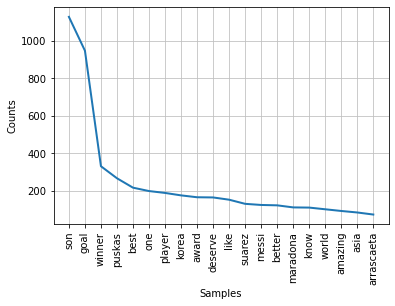

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# 손흥민
print("top 10")
print("모든 단어")
print(top3_fd[0].most_common(10), end="\n\n")

print("명사")
print(top3_nouns[0].most_common(10), end="\n\n")

print("형용사")
print(top3_adjectives[0].most_common(10), end="\n\n")

print("Bigram")
print(top3_bigram[0].most_common(10), end="\n\n")

print("Trigram")
print(top3_trigram[0].most_common(10), end="\n\n")
print("top20")
top3_fd[0].plot(20)
# top3_adjectives[0].plot(20)

빈도수 분석을 통해 단순한 숫자 분석 이면의 사실도 확인함
<br>

* 손흥민을 지칭하는 단어들이 역시나 가장 많이 나옴 <br>
* winner, best, award, deserve가 크게 나타나는 것을 보아, 그가 1등했다는 것을 짐작이 가능함 <br>
* 그리고 korea, asia가 큰 것을 보아 그의 국적을 알 수 있음 <br>
* messi, maradona를 보아 그가 전성기 시절 메시, 마라도나를 연상시킨다는 말이 많이 나왔음을 짐작해봄

<br>
2) 아라스카에타 골 동영상 (TOP 3 랭크)
<br>

* 우루과이어가 전처리 되지 않은 것을 확인하여 이후 분석에서 제외함

top 10
모든 단어
[('de', 154), ('que', 122), ('goal', 111), ('arrascaeta', 86), ('e', 81), ('son', 78), ('não', 71), ('é', 70), ('best', 63), ('winner', 48)]

명사
[('goal', 111), ('que', 98), ('arrascaeta', 79), ('son', 71), ('é', 57), ('e', 53), ('gol', 34), ('como', 31), ('melhor', 29), ('flamengo', 29)]

형용사
[('best', 52), ('um', 33), ('não', 27), ('uma', 21), ('que', 18), ('beautiful', 17), ('better', 13), ('contra', 11), ('ele', 10), ('n', 10)]

Bigram
[(('de', 'arrascaeta'), 16), (('best', 'goal'), 13), (('de', 'ouro'), 13), (('arrascaeta', 'goal'), 12), (('go', 'arrascaeta'), 11), (('deserve', 'winner'), 10), (('não', 'é'), 10), (('beautiful', 'goal'), 9), (('um', 'gol'), 8), (('de', 'bicicleta'), 8)]

Trigram
[(('bolas', 'de', 'ouro'), 7), (('israel', 'asaph', 'fla'), 6), (('la', 'casa', 'de'), 5), (('casa', 'de', 'gabriel'), 5), (('um', 'gol', 'de'), 5), (('bola', 'de', 'ouro'), 5), (('uma', 'copa', 'mundo'), 5), (('50', 'anos', 'atrás'), 5), (('giorgian', 'de', 'arrascaeta'), 4), 

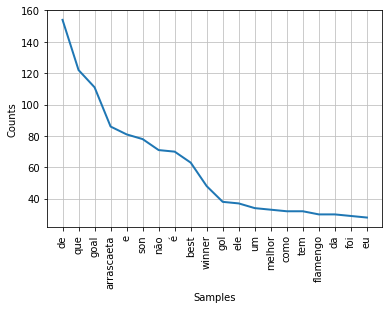

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
# 아라스카에타
print("top 10")
print("모든 단어")
print(top3_fd[1].most_common(10), end="\n\n")

print("명사")
print(top3_nouns[1].most_common(10), end="\n\n")

print("형용사")
print(top3_adjectives[1].most_common(10), end="\n\n")

print("Bigram")
print(top3_bigram[1].most_common(10), end="\n\n")

print("Trigram")
print(top3_trigram[1].most_common(10), end="\n\n")
print("top 20")
top3_fd[1].plot(20)

스페인어 전치사인 de와 대명사겸 접속사인 que가 크게 나타남 <br>

전처리의 실패임 <br>

* 이를 통해 라틴권에서 인기가 많음을 알 수 있음

<br>
3) 수아레즈 골 동영상 (TOP 3 랭크) <br>
<br>
* 같은 우루과이 국적의 선수이지만, <br>
스페인 프리메라리가에서 활동하는 월드클래스 선수라 영어 댓글이 많았음

top 10
모든 단어
[('goal', 332), ('son', 230), ('suarez', 126), ('like', 69), ('winner', 58), ('one', 56), ('puskas', 46), ('arrascaeta', 43), ('messi', 38), ('better', 36)]

명사
[('goal', 332), ('son', 222), ('suarez', 108), ('arrascaeta', 42), ('puskas', 41), ('messi', 33), ('player', 28), ('winner', 26), ('award', 21), ('ball', 21)]

형용사
[('best', 27), ('meny', 22), ('better', 17), ('great', 14), ('special', 13), ('beautiful', 11), ('suarez', 11), ('korea', 9), ('lucky', 9), ('unique', 9)]

Bigram
[(('son', 'goal'), 65), (('suarez', 'goal'), 29), (('son', 'son'), 25), (('goal', 'like'), 22), (('puskas', 'award'), 14), (('best', 'goal'), 14), (('better', 'son'), 12), (('winner', 'puskas'), 11), (('arrascaeta', 'arrascaeta'), 11), (('luis', 'suarez'), 10)]

Trigram
[(('better', 'son', 'goal'), 6), (('son', 'son', 'son'), 6), (('winner', 'puskas', 'award'), 5), (('arrascaeta', 'arrascaeta', 'arrascaeta'), 5), (('see', 'goal', 'like'), 4), (('goal', 'like', 'son'), 4), (('deserve', 'puskas',

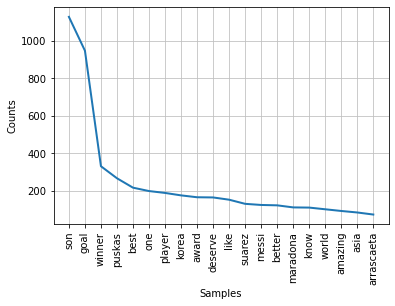

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
# 수아레즈
print("top 10")
print("모든 단어")
print(top3_fd[2].most_common(10), end="\n\n")

print("명사")
print(top3_nouns[2].most_common(10), end="\n\n")

print("형용사")
print(top3_adjectives[2].most_common(10), end="\n\n")

print("Bigram")
print(top3_bigram[2].most_common(10), end="\n\n")

print("Trigram")
print(top3_trigram[2].most_common(10), end="\n\n")
print("top 20")
top3_fd[0].plot(20)

son과 messi가 비교적 크게 나타나는 것으로 보아 그들의 골과 자주 비교됨을 알 수 있음

<br>
4) 캐롤라인위어 골 동영상 <br>
<br>
* 후보자 중에서 유일한 여성 후보자인데, 이와 관련한 댓글 내용이 많았음

top 10
모든 단어
[('goal', 51), ('women', 27), ('men', 13), ('puskas', 12), ('football', 8), ('every', 7), ('award', 7), ('world', 7), ('one', 7), ('nosonated', 6)]

명사
[('goal', 51), ('women', 25), ('men', 13), ('puskas', 11), ('football', 8), ('award', 7), ('world', 7), ('salah', 6), ('league', 6), ('golazo', 5)]

형용사
[('best', 5), ('better', 5), ('nice', 4), ('separate', 2), ('great', 2), ('meny', 2), ('worthy', 2), ('beautiful', 2), ('women', 2), ('funny', 1)]

Bigram
[(('salah', 'goal'), 5), (('women', 'goal'), 4), (('puskas', 'award'), 4), (('goal', 'scored'), 3), (('goal', 'like'), 3), (('every', 'weekend'), 3), (('men', 'women'), 3), (('goal', 'month'), 3), (('premier', 'league'), 3), (('women', 'football'), 3)]

Trigram
[(('even', 'winner', 'premier'), 2), (('winner', 'premier', 'league'), 2), (('premier', 'league', 'goal'), 2), (('league', 'goal', 'month'), 2), (('better', 'salah', 'goal'), 2), (('salah', 'goal', '2018'), 2), (('donde', 'esta', 'el'), 2), (('esta', 'el', 'golazo'

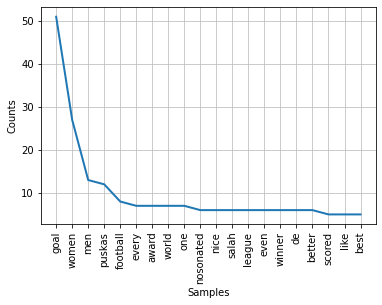

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
# 캐롤라인위어
print("top 10")
print("모든 단어")
print(top3_fd[3].most_common(10), end="\n\n")

print("명사")
print(top3_nouns[3].most_common(10), end="\n\n")

print("형용사")
print(top3_adjectives[3].most_common(10), end="\n\n")

print("Bigram")
print(top3_bigram[3].most_common(10), end="\n\n")

print("Trigram")
print(top3_trigram[3].most_common(10), end="\n\n")
print("top 20")
top3_fd[3].plot(20)

<br>
<br>
5) 전체 후보자 소개 동영상

top 10
모든 단어
[('son', 1010), ('goal', 613), ('arrascaeta', 275), ('suarez', 264), ('winner', 189), ('best', 141), ('one', 112), ('de', 99), ('like', 90), ('player', 83)]

명사
[('son', 971), ('goal', 613), ('arrascaeta', 270), ('suarez', 248), ('player', 83), ('award', 76), ('puskas', 71), ('football', 70), ('league', 67), ('gignac', 65)]

형용사
[('best', 122), ('better', 34), ('son', 29), ('beautiful', 23), ('sure', 21), ('korea', 20), ('bad', 18), ('entire', 18), ('meny', 17), ('top', 16)]

Bigram
[(('son', 'son'), 181), (('son', 'goal'), 103), (('suarez', 'goal'), 55), (('son', 'winner'), 52), (('rk', 'football'), 40), (('best', 'goal'), 39), (('de', 'arrascaeta'), 37), (('goal', 'like'), 33), (('son', 'suarez'), 32), (('winner', 'son'), 32)]

Trigram
[(('son', 'son', 'son'), 64), (('son', 'winner', 'son'), 13), (('best', 'league', 'world'), 13), (('son', 'son', 'goal'), 11), (('lazaro', 'scorpion', 'kick'), 10), (('arrascaeta', 'arrascaeta', 'arrascaeta'), 9), (('dundalk', 'mens', 'goa

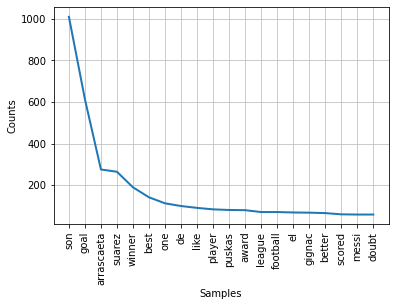

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
# 전체 후보자 소개
print("top 10")
print("모든 단어")
print(top3_fd[4].most_common(10), end="\n\n")

print("명사")
print(top3_nouns[4].most_common(10), end="\n\n")

print("형용사")
print(top3_adjectives[4].most_common(10), end="\n\n")

print("Bigram")
print(top3_bigram[4].most_common(10), end="\n\n")

print("Trigram")
print(top3_trigram[4].most_common(10), end="\n\n")
print("top 20")
top3_fd[4].plot(20)
# top3_adjectives[0].plot(20)

수상자인 손흥민에 대한 댓글이 가장 많았음

<br>
<br>
6) 흐롬포케카나 골 동영상

top 10
모든 단어
[('goal', 24), ('one', 18), ('winner', 16), ('son', 14), ('long', 13), ('best', 11), ('deserve', 10), ('hlompho', 9), ('puskas', 9), ('men', 8)]

명사
[('goal', 24), ('son', 14), ('one', 12), ('hlompho', 9), ('puskas', 9), ('men', 8), ('shot', 6), ('range', 6), ('time', 6), ('award', 6)]

형용사
[('best', 9), ('long', 9), ('better', 4), ('african', 3), ('ntate', 2), ('incredible', 2), ('least', 2), ('greatest', 2), ('south', 2), ('range', 2)]

Bigram
[(('long', 'range'), 8), (('best', 'one'), 4), (('son', 'goal'), 3), (('range', 'shots'), 3), (('hope', 'winners'), 3), (('nosonated', 'puskas'), 3), (('range', 'goal'), 3), (('never', 'give'), 3), (('give', 'hope'), 3), (('hope', 'brings'), 3)]

Trigram
[(('long', 'range', 'shots'), 3), (('long', 'range', 'goal'), 3), (('never', 'give', 'hope'), 3), (('give', 'hope', 'brings'), 3), (('hope', 'brings', 'puskas'), 3), (('brings', 'puskas', 'sa'), 3), (('simple', 'solo', 'run'), 2), (('better', 'son', 'know'), 1), (('son', 'know', 's

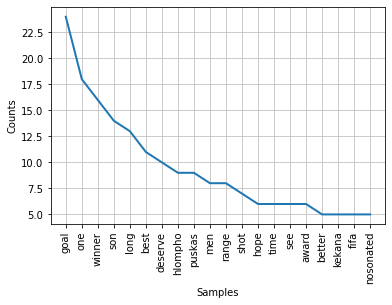

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
# 흐롬포케카나
print("top 10")
print("모든 단어")
print(top3_fd[5].most_common(10), end="\n\n")

print("명사")
print(top3_nouns[5].most_common(10), end="\n\n")

print("형용사")
print(top3_adjectives[5].most_common(10), end="\n\n")

print("Bigram")
print(top3_bigram[5].most_common(10), end="\n\n")

print("Trigram")
print(top3_trigram[5].most_common(10), end="\n\n")
print("top 20")
top3_fd[5].plot(20)
# top3_adjectives[0].plot(20)

<br>
<br>

# 분석 내용 2 : 워드클라우드

1) 손흥민 골 동영상

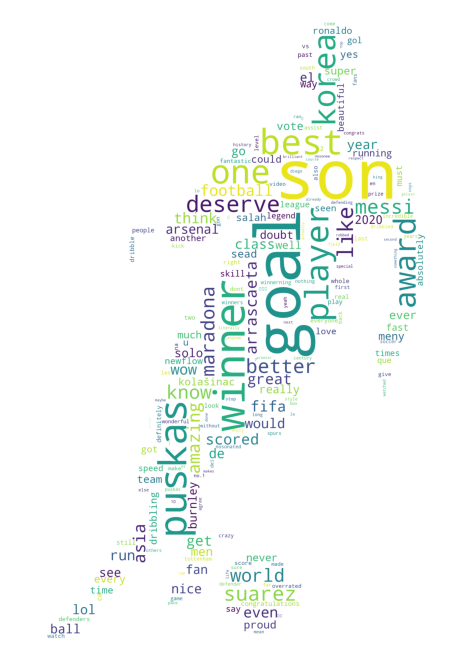

In [26]:
soccer_mask = np.array(Image.open('soccer_player.jpg'))

wc = WordCloud(width=1000, height=1000, background_color="white", mask=soccer_mask, random_state=0)
plt.figure(figsize=(12, 12))
plt.imshow(wc.generate_from_frequencies(top3_fd[0]))
plt.axis("off")
plt.show()
# plt.savefig('word_cloud.png')

<br>
<br>
2) 아라스카에타 골 동영상

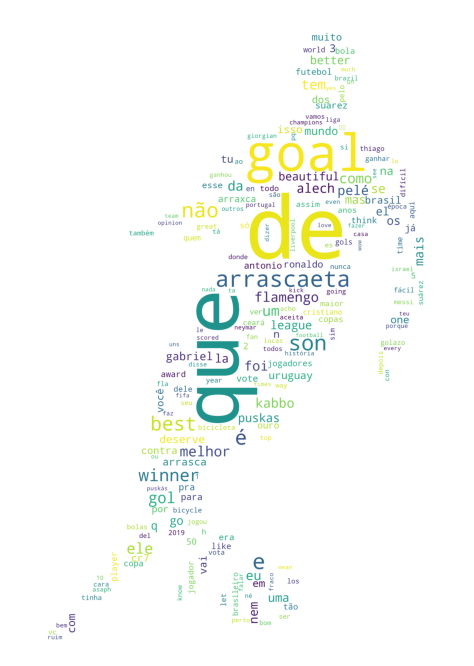

In [27]:
soccer_mask = np.array(Image.open('soccer_player.jpg'))

wc = WordCloud(width=1000, height=1000, background_color="white", mask=soccer_mask, random_state=0)
plt.figure(figsize=(12, 12))
plt.imshow(wc.generate_from_frequencies(top3_fd[1]))
plt.axis("off")
plt.show()

<br>
<br>
3) 수아레즈 골 동영상

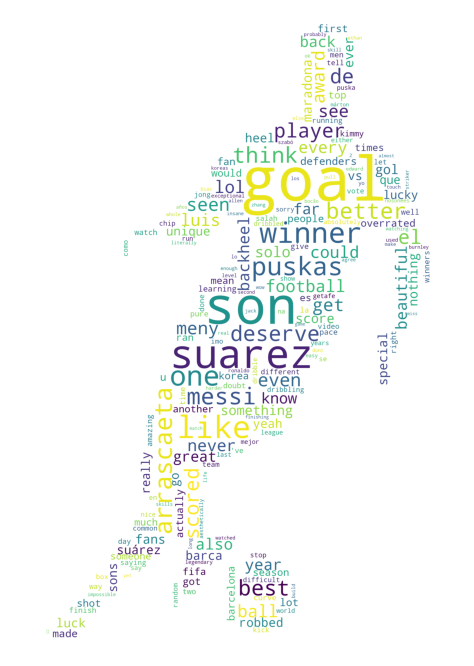

In [28]:
soccer_mask = np.array(Image.open('soccer_player.jpg'))

wc = WordCloud(width=1000, height=1000, background_color="white", mask=soccer_mask, random_state=0)
plt.figure(figsize=(12, 12))
plt.imshow(wc.generate_from_frequencies(top3_fd[2]))
plt.axis("off")
plt.show()

<br>
<br>
4) 캐롤라인위어 골 동영상

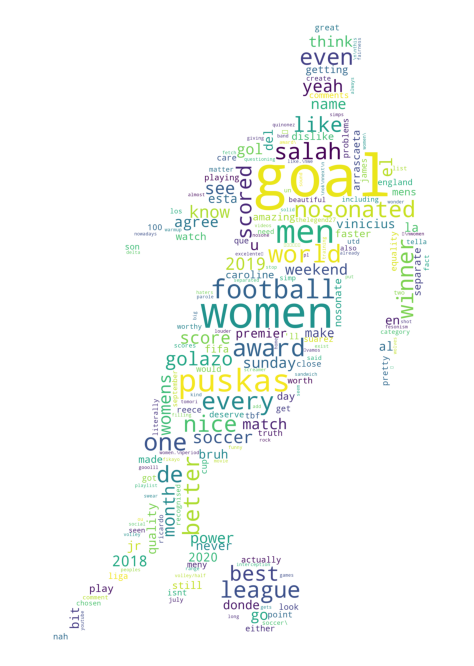

In [29]:
soccer_mask = np.array(Image.open('soccer_player.jpg'))

wc = WordCloud(width=1000, height=1000, background_color="white", mask=soccer_mask, random_state=0)
plt.figure(figsize=(12, 12))
plt.imshow(wc.generate_from_frequencies(top3_fd[3]))
plt.axis("off")
plt.show()

<br>
<br>
5) 전체 후보자 소개 동영상

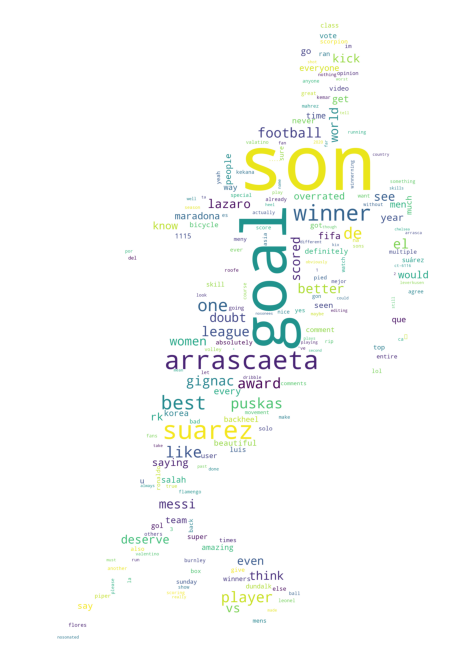

In [30]:
soccer_mask = np.array(Image.open('soccer_player.jpg'))

wc = WordCloud(width=1000, height=1000, background_color="white", mask=soccer_mask, random_state=0)
plt.figure(figsize=(12, 12))
plt.imshow(wc.generate_from_frequencies(top3_fd[4]))
plt.axis("off")
plt.show()

<br>
<br>
6) 흐롬포케카나 골 동영상

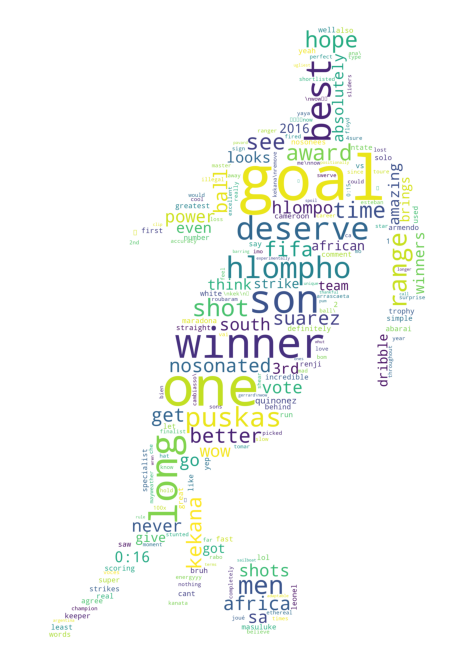

In [31]:
soccer_mask = np.array(Image.open('soccer_player.jpg'))

wc = WordCloud(width=1000, height=1000, background_color="white", mask=soccer_mask, random_state=0)
plt.figure(figsize=(12, 12))
plt.imshow(wc.generate_from_frequencies(top3_fd[5]))
plt.axis("off")
plt.show()

* 이후 내용들은 동영상 별로 댓글 분포가 일치하지 않으므로, <br> 통계적으로 유의하지는 않은 결과임

<br>
<br>

# 분석 내용 3 : TF-IDF
<br>
* 위에서 분석한 4명의 후보자 동영상의 댓글을 바탕으로 TF-IDF를 구함

In [32]:
# word_dict = set(top3_tokens[0]) | set(top3_tokens[2])
word_dict = set(top3_tokens[0]) | set(top3_tokens[2]) | set(top3_tokens[3]) | set(top3_tokens[4]) | set(top3_tokens[5])
print("동영상을 토대로 만들어진 단어 사전의 단어 개수 : ", len(word_dict))

동영상을 토대로 만들어진 단어 사전의 단어 개수 :  8011


In [33]:
top3_rev = []
top3_rev.append('. '.join(list(dfs[9]["text"]))) # 손흥민 댓글 (한국어 존재)
top3_rev.append('. '.join(list(dfs[7]["text"]))) # 수아레즈 댓글

top3_rev.append(' '.join(list(dfs[1]["text"]))) # 캐롤라인위어 댓글
# top3_rev.append(' '.join(list(dfs[2]["text"]))) # 전체 후보자 소개 동영상 댓글
top3_rev.append(' '.join(list(dfs[4]["text"]))) # 흐롬포케카나 댓글

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             lowercase = True,
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 3),
                             vocabulary = word_dict, # nltk의 words를 사용하거나 문서 자체의 사전을 만들거나 선택한다. 
                             max_features = 90000
                            )
vectorizer

CountVectorizer(max_features=90000, min_df=2, ngram_range=(1, 3),
                stop_words='english',
                vocabulary={"'-",
                            "'15'😏😏😏😏😏😏😏😏😏😏😜😜😜😜😜😜😜😜😜😜😆😆😆😆😆😆😆😆😆😆😂😂😂😂😂😂😂😂😂😂",
                            "'7s", "'arsenal", "'carry", "'cause", "'d", "'did",
                            "'fast", "'gukbbong", "'ll", "'no.7", "'only",
                            "'pain", "'skillful", "'smarter", "'son",
                            "'son'shine", "'sonic", "'ve", "'vote", "'부사구",
                            '+++++++', '+5', '+dribble', '+premier', ',i',
                            ',son', '--', '-are', ...})

In [34]:
pipeline = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer(smooth_idf = False)),
])  
pipeline

Pipeline(steps=[('vect',
                 CountVectorizer(max_features=90000, min_df=2,
                                 ngram_range=(1, 3), stop_words='english',
                                 vocabulary={"'-",
                                             "'15'😏😏😏😏😏😏😏😏😏😏😜😜😜😜😜😜😜😜😜😜😆😆😆😆😆😆😆😆😆😆😂😂😂😂😂😂😂😂😂😂",
                                             "'7s", "'arsenal", "'carry",
                                             "'cause", "'d", "'did", "'fast",
                                             "'gukbbong", "'ll", "'no.7",
                                             "'only", "'pain", "'skillful",
                                             "'smarter", "'son", "'son'shine",
                                             "'sonic", "'ve", "'vote", "'부사구",
                                             '+++++++', '+5', '+dribble',
                                             '+premier', ',i', ',son', '--',
                                             '-are', ...})),
                ('tfi

In [35]:
%time X_train_tfidf_vector = pipeline.fit_transform(top3_rev)

Wall time: 95 ms


C:\Users\user\Anaconda3\envs\NLPLee\lib\site-packages\sklearn\feature_extraction\text.py:1448: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


In [36]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

8011


["'-",
 "'15'😏😏😏😏😏😏😏😏😏😏😜😜😜😜😜😜😜😜😜😜😆😆😆😆😆😆😆😆😆😆😂😂😂😂😂😂😂😂😂😂",
 "'7s",
 "'arsenal",
 "'carry",
 "'cause",
 "'d",
 "'did",
 "'fast",
 "'gukbbong"]

In [37]:
import numpy as np
dist = np.sum(X_train_tfidf_vector, axis=0)

for tag, count in zip(vocab, dist):
    print(count, tag)

result = pd.DataFrame(dist, columns=vocab)
result = result.transpose()
result = result.sort_values(by=[0], axis=0, ascending=False)
result[0:20]

[[0. 0. 0. ... 0. 0. 0.]] '-


,0
goal,1.966231
son,1.252462
puskas,0.598517
women,0.519756
best,0.475733
suarez,0.475261
award,0.367837
like,0.366348
better,0.324775
messi,0.296362


In [38]:
result.to_csv('r.csv',index=False)

<br>
<br>

# 분석 내용 4 : 토픽 모델링

## LSA(Latent Semantic Analysis)

특이값 분해 SVD, Singular Value Decomposition

In [39]:
from sklearn.decomposition import TruncatedSVD

# 특이값 분해(Singular Value Decomposition)
svd = TruncatedSVD(n_components=20,
                     algorithm='randomized',
                     n_iter=100)

svd.fit(X_train_tfidf_vector)

TruncatedSVD(n_components=20, n_iter=100)

In [40]:
# 20개의 토픽마다 1000개의 단어 존재
np.shape(svd.components_)


(4, 8011)

In [41]:
# 단어 이름
feature_names = vectorizer.get_feature_names()

# 토픽의 최대 단어 개수
max_word = 5

# 토픽당 연관도가 높은 순으로 5개의 단어들을 추출
for idx, topic in enumerate(svd.components_):
    print("Topic %d:" % (idx+1))
    print([(feature_names[i], topic[i].round(3)) for i in topic.argsort()[:-max_word - 1:-1]])
    print()


Topic 1:
[('goal', 0.639), ('son', 0.437), ('puskas', 0.185), ('suarez', 0.162), ('best', 0.148)]

Topic 2:
[('women', 0.462), ('men', 0.154), ('goal', 0.125), ('world', 0.096), ('soccer', 0.087)]

Topic 3:
[('women', 0.323), ('hlompho', 0.206), ('long', 0.188), ('kekana', 0.16), ('sa', 0.13)]

Topic 4:
[('son', 0.204), ('winner', 0.163), ('world', 0.156), ('class', 0.142), ('puskas', 0.14)]



<br>
<br>

# 분석 내용 5 : 감성 분석

* 감성 분석(Sentiment Analysis)의 경우에는, <br> 댓글의 라벨링을 진행하지 않았기 때문에 제대로 수행할 수는 없었음
<br> 따라서, "규칙, 단어(사전) 기반의" 감성 분석을 수행해봄

## 1) SentiWordNet

In [42]:
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
# 원형복원기 설정
lemmatizer = WordNetLemmatizer()


# PennTreebank 품사를 WordNet 품사로 변환
def penn_to_wn(tag):
    
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
 

# 텍스트 정제
def clean_text(text):
    
    # text = text.replace("<br />", " ")
 
    return text
 

# SentiWordNet으로 감정 분석
def swn_polarity(text):
 
    sentiment = 0.0
    tokens_count = 0
 
    # 텍스트 정제
    text = clean_text(text)
    
    # 문장으로 구분하여 토큰 추출
    raw_sentences = sent_tokenize(text)

    # 모든 문장 반복
    for raw_sentence in raw_sentences:
        # 문장의 단어 토큰을 추출하여 품사 부착
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
 
        # 모든 태그된 문장 반복
        for word, tag in tagged_sentence:
            # PennTreebank 품사를 WordNet 품사로 변환
            wn_tag = penn_to_wn(tag)
            
            # 명사, 형용사, 부사만 사용
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
 
            # 단어의 원형복원
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
 
            # 단어의 유의어를 WordNet에서 검색
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
 
            # 첫 번째 유의어를 선택하여 SentiWordNet 구함
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
 
            # 단어의 감정 점수 계산
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
 
    # 토큰이 없다면 부정 리턴
    if not tokens_count:
        return 0
 
    # 감정 점수가 0보다 크다면 긍정 리턴
    if sentiment >= 0:
        return 1
 
    # 부정 리턴
    return 0

In [44]:
# 긍정 판단
print("긍정 판단 예시, This movie is awesome!")
swn_polarity("This movie is awesome!")


긍정 판단 예시, This movie is awesome!


1

In [45]:
# 부정 판단
print("부정 판단 예시, This movie is terrible!")
swn_polarity("This movie is terrible!")


부정 판단 예시, This movie is terrible!


0

In [46]:
# 잘못된 판단
print("잘몬된 판단 예시, I don't like this movie. It's a huge waste of time.")
swn_polarity("I don't like this movie. It's a huge waste of time.")


잘몬된 판단 예시, I don't like this movie. It's a huge waste of time.


1

In [47]:
# 댓글 분리

son_text = dfs[9]["text"]
sua_text = dfs[7]["text"]

car_text = dfs[1]["text"]
hlo_text = dfs[4]["text"]

In [48]:
# from sklearn.metrics import accuracy_score

# SentiWordNet으로 감정 분석 예측
pred_son = [swn_polarity(text) for text in son_text]
pred_sua = [swn_polarity(text) for text in sua_text]

pred_car = [swn_polarity(text) for text in car_text]
pred_hlo = [swn_polarity(text) for text in hlo_text]

# 라벨값과 예측값으로 정확도 측정
# print(accuracy_score(test_y, pred_y))

In [49]:
print("손흥민")
print("긍정으로 예측한 댓글 수 : ", sum(pred_son))
print("부정으로 예측한 댓글 수 : ", len(pred_son)- sum(pred_son))
print("긍정 예측 비율 :", sum(pred_son)/len(pred_son), end='\n\n')

print("수아레즈")
print("긍정으로 예측한 댓글 수 : ", sum(pred_sua))
print("부정으로 예측한 댓글 수 : ", len(pred_sua)- sum(pred_sua))
print("긍정 예측 비율 :", sum(pred_sua)/len(pred_sua), end='\n\n')

print("캐롤라인위어")
print("긍정으로 예측한 댓글 수 : ", sum(pred_car))
print("부정으로 예측한 댓글 수 : ", len(pred_car)- sum(pred_car))
print("긍정 예측 비율 :", sum(pred_car)/len(pred_car), end='\n\n')

print("흐롬포케카나")
print("긍정으로 예측한 댓글 수 : ", sum(pred_hlo))
print("부정으로 예측한 댓글 수 : ", len(pred_hlo)- sum(pred_hlo))
print("긍정 예측 비율 :", sum(pred_hlo)/len(pred_hlo))

손흥민
긍정으로 예측한 댓글 수 :  2436
부정으로 예측한 댓글 수 :  1493
긍정 예측 비율 : 0.6200050903537796

수아레즈
긍정으로 예측한 댓글 수 :  468
부정으로 예측한 댓글 수 :  259
긍정 예측 비율 : 0.6437414030261348

캐롤라인위어
긍정으로 예측한 댓글 수 :  88
부정으로 예측한 댓글 수 :  43
긍정 예측 비율 : 0.6717557251908397

흐롬포케카나
긍정으로 예측한 댓글 수 :  92
부정으로 예측한 댓글 수 :  56
긍정 예측 비율 : 0.6216216216216216


<br>
<br>

## NLTK VADER Sentiment Intensity Analyzer

In [50]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

# 감정 분석기 설정
vader = SentimentIntensityAnalyzer()


# VADER로 감정 분석
def vader_polarity(text):

    # 감정 점수 계산
    score = vader.polarity_scores(text)
    
    return 1 if score['pos'] > score['neg'] else 0

In [52]:
# VADER로 감정 분석 예측
pred_son = [vader_polarity(text) for text in son_text]
pred_sua = [vader_polarity(text) for text in sua_text]

pred_car = [vader_polarity(text) for text in car_text]
pred_hlo = [vader_polarity(text) for text in hlo_text]

# 라벨값과 예측값으로 정확도 측정
# print(accuracy_score(test_y, pred_y))


In [53]:
print("손흥민")
print("긍정으로 예측한 댓글 수 : ", sum(pred_son))
print("부정으로 예측한 댓글 수 : ", len(pred_son)- sum(pred_son))
print("긍정비율 :", sum(pred_son)/len(pred_son), end='\n\n')

print("수아레즈")
print("긍정으로 예측한 댓글 수 : ", sum(pred_sua))
print("부정으로 예측한 댓글 수 : ", len(pred_sua)- sum(pred_sua))
print("긍정비율 :", sum(pred_sua)/len(pred_sua), end='\n\n')

print("캐롤라인위어")
print("긍정으로 예측한 댓글 수 : ", sum(pred_car))
print("부정으로 예측한 댓글 수 : ", len(pred_car)- sum(pred_car))
print("긍정 예측 비율 :", sum(pred_car)/len(pred_car), end='\n\n')

print("흐롬포케카나")
print("긍정으로 예측한 댓글 수 : ", sum(pred_hlo))
print("부정으로 예측한 댓글 수 : ", len(pred_hlo)- sum(pred_hlo))
print("긍정 예측 비율 :", sum(pred_hlo)/len(pred_hlo))

손흥민
긍정으로 예측한 댓글 수 :  1443
부정으로 예측한 댓글 수 :  2486
긍정비율 : 0.3672690251972512

수아레즈
긍정으로 예측한 댓글 수 :  302
부정으로 예측한 댓글 수 :  425
긍정비율 : 0.4154057771664374

캐롤라인위어
긍정으로 예측한 댓글 수 :  54
부정으로 예측한 댓글 수 :  77
긍정 예측 비율 : 0.4122137404580153

흐롬포케카나
긍정으로 예측한 댓글 수 :  64
부정으로 예측한 댓글 수 :  84
긍정 예측 비율 : 0.43243243243243246


<br>
<br>

### 규칙 기반의 감성 분석의 경우, 다른 후보자들의 긍정 댓글로 예측하는 비율이 손흥민 선수 보다 높았음
<br>

### * 해석 : <br>
* 1) 축구 댓글의 경우, 잘하는 선수에게 부정적인 단어를 사용할 수 있음 (중의적 표현 존재) <br>
따라서, 일반적인 단어사전으로 구축된 감성 분석을 사용하는 것이 부적절 할 수 있음
라벨링 후에 ML,DL 기법을 적용해보는 것이 필요함
<br>
<br>
* 2) 전처리 과정에서의 문제점 존재 가능성 <br>
댓글의 경우, 공적인 문서들에 비해 데이터가 깔끔하지 않음, 이모티콘의 사용 등
<br>
<br>
* 3) 댓글의 긍정 비율보다는, 긍정으로 예측한 단어의 빈도수가 더 중요할 수 있음 <br>
긍정 댓글의 수와 투표 수와의 상관관계 분석이 필요함
<br>
<br>
* 4) 축구 전문가 패널 투표 (50%)의 영향이 판도를 뒤집음 <br>
2018년도 까지는 팬투표 (100%)로 수상이 결정되었음 <br>
이에 대한 논란으로 2019년도부터 바뀐 방식이 적용됨 <br>
실제로, 히오르히안 데아라스카에타가 1위를 차지했지만, <br>
손흥민이 팬 투표 2위, 전문가 투표 1위를 종합한 합산 점수 1위로 푸스카스상을 수상했다는 분석이 있음





<br>
<br>

### 참고) 토크나이저 비교 (손흥민)

* nltk의 SpaceTokenizer(), TweetTokenizer(), word_tokenize()와 keras의 text_to_word_sequence()에 대한 4가지 토크나이저를 비교 실험함
<br>

* 단어가 가장 깔끔한 word_tokenize()를 선택함

In [54]:
import nltk
from tensorflow import keras

son_text = ' '.join(list(dfs[9]["text"]))
custom_stopwords = ['\'\'', '``', '!', '?', '...', '’', '..', '....' ]
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)+custom_stopwords

space_tokens = nltk.SpaceTokenizer().tokenize(son_text)
space_tokens = [w.lower() for w in space_tokens if w.lower() not in stopwords]

tweet_tokens = nltk.TweetTokenizer().tokenize(son_text)
tweet_tokens = [w.lower() for w in tweet_tokens if w.lower() not in stopwords]

word_tokens = nltk.word_tokenize(son_text)
word_tokens = [w.lower() for w in word_tokens if w.lower() not in stopwords]

keras_tokens = keras.preprocessing.text.text_to_word_sequence(son_text)
keras_tokens = [w.lower() for w in keras_tokens if w.lower() not in stopwords]

print('토큰 수 : (총 토큰 수, 고유 토큰 수)')
print(f' SpaceTokenizer: ({len(space_tokens)}, {len(set(space_tokens))})')
print(f' TweetTokenizer: ({len(tweet_tokens)}, {len(set(tweet_tokens))})')
print(f' word_tokenize:  ({len(word_tokens)}, {len(set(word_tokens))})')
print(f' Keras:          ({len(keras_tokens)}, {len(set(keras_tokens))})')

# print('\n토큰 : ')
# print('SpaceTokenizer:\n', space_tokens, sep='', end='\n\n')

C:\Users\user\Anaconda3\envs\NLPLee\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\NLPLee\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\NLPLee\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\NLPLee\lib\site-packages\tensorflow\python\f

토큰 수 : (총 토큰 수, 고유 토큰 수)
 SpaceTokenizer: (21322, 7916)
 TweetTokenizer: (21204, 4795)
 word_tokenize:  (19810, 5105)
 Keras:          (20215, 5073)


In [55]:
# print('TweetTokenizer:\n', tweet_tokens, sep='', end='\n\n')

In [56]:
# print('word_tokenize:\n', word_tokens, sep='', end='\n\n')

In [57]:
# print('Keras:\n', keras_tokens, sep='', end='\n\n')

In [58]:
space_tokens_fd = nltk.FreqDist(space_tokens)
tweet_tokens_fd = nltk.FreqDist(tweet_tokens)
word_tokens_fd = nltk.FreqDist(word_tokens)
keras_tokens_fd = nltk.FreqDist(keras_tokens)
print("SpaceTokenizer 상위 빈도수 20개")
space_tokens_fd.most_common(20)

SpaceTokenizer 상위 빈도수 20개


[('goal', 563),
 ('son', 269),
 ('', 246),
 ('puskas', 183),
 ('"son', 159),
 ('"this', 159),
 ('one', 154),
 ('"he', 144),
 ('like', 143),
 ('best', 140),
 ('"i', 119),
 ('know', 110),
 ('goals', 104),
 ('win', 92),
 ('award', 90),
 ('messi', 85),
 ('better', 77),
 ('"the', 77),
 ('winner', 68),
 ('suarez', 66)]

In [59]:
print("TweetTokenizer 상위 빈도수 20개")
tweet_tokens_fd.most_common(20)

TweetTokenizer 상위 빈도수 20개


[('goal', 843),
 ('son', 799),
 ('🇷', 277),
 ('🇰', 270),
 ('puskas', 268),
 ('best', 223),
 ('🔥', 205),
 ('one', 200),
 ('sonny', 193),
 ('winner', 179),
 ('award', 172),
 ('win', 168),
 ('n', 162),
 ('like', 154),
 ('better', 125),
 ('goals', 122),
 ('messi', 121),
 ('player', 118),
 ('👍', 115),
 ('suarez', 113)]

In [60]:
print("word_tokenize 상위 빈도수 20개")
word_tokens_fd.most_common(20)

word_tokenize 상위 빈도수 20개


[('goal', 826),
 ('son', 779),
 ("'s", 361),
 ('puskas', 268),
 ('best', 218),
 ('one', 200),
 ('sonny', 174),
 ('winner', 169),
 ('award', 167),
 ('win', 163),
 ('like', 154),
 ('suarez', 132),
 ("n't", 132),
 ('messi', 126),
 ('better', 124),
 ('goals', 121),
 ('player', 117),
 ('maradona', 113),
 ('know', 112),
 ('world', 103)]

In [61]:
print("Keras 토크나이저 상위 빈도수 20개")
keras_tokens_fd.most_common(20)

Keras 토크나이저 상위 빈도수 20개


[('goal', 840),
 ('son', 744),
 ('\xa0', 388),
 ('puskas', 268),
 ('best', 220),
 ('one', 200),
 ('sonny', 175),
 ('winner', 174),
 ('award', 169),
 ('win', 166),
 ('like', 155),
 ('n', 131),
 ('better', 124),
 ('goals', 122),
 ('messi', 119),
 ('player', 116),
 ('know', 112),
 ('suarez', 110),
 ('world', 110),
 ('korean', 107)]

<br>
<br>

# 3. 결론

#### 1) 동영상의 댓글 수, 단어의 빈도수, 좋아요 수, 조회수 등은 일반적으로 올해의 골
#### 등수를 예측할 수 있는 지표이지만, 이러한 주장이 
#### 통계적으로 유의미하다고 할 수는 없음
<br>

#### 2) 유튜브 댓글 크롤링 시 타임스탬프 표시 관련 이슈가 있었기 때문에, 
#### 시간에 따른, 시상식 전후 비교가 어려웠음
<br>

#### 추후 분석 시에는 크롤러의 기능을 전문화하거나, 
#### 수집 주기를 정하고 수집한다면 (ex. 매일, 매주, 매달 등의 기준 설정), 
#### 이런 분석이 가능할 듯 보임.
<br>

#### 3) 전처리 심화(임베딩 포함) 및 라벨링 작업 후에 Deep한 모델(Bert 등)로,
#### 감성 분석을 하면, 더욱더 의미있는 결과가 나올 수 있음

<br>
    <br>
        
# 감사합니다.